### Домашня работа 2.
### Логистическая регрессия. Работа с признаками


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Можно получить 4.5 бонусных балла.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
print('Всем удачи!👒 Тут она точно пригодится.')

Всем удачи!👒 Тут она точно пригодится.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Логистическая регрессия своими руками (4 балла)

Реализуйте логистическую регрессию, обучаемую с помощью:

**Задание 1 (1.5 балла). Градиентного спуска**

**Задание 2 (1.5 балла). Стохастического градиентного спуска**

Во всех пунктах необходимо соблюдать следующие условия:
- Градиентный спуск необходимо записать в векторном виде
- Циклы средствами python допускается использовать только для итераций градиентного спуска;
- В качестве критерия останова необходимо использовать (одновременно):

        проверку на евклидову норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) задаваемого параметром `tolerance`;


        достижение максимального числа итераций (например, 10000), задаваемого параметром `max_iter`.

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса loss_history. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту);

Инициализировать веса можно случайным образом или нулевым вектором.

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

In [4]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-5, max_iter=100, w0=None, eta=1e-2, batch_size=128):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        #self.alpha = alpha
        self.batch_size = batch_size
        self.w = w0
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.w = self.w0
        self.loss_history = [self.calc_loss(X, y)]
        if self.gd_type == 'full':
          for _ in range(self.max_iter):
            grad = self.calc_gradient(X, y)
            new_w = self.w - self.eta * grad
            if np.linalg.norm(new_w - self.w) < self.tolerance:
              return self
            self.w = new_w
            self.loss_history.append(self.calc_loss(X, y))

        if self.gd_type == 'stochastic':
          for _ in range(self.max_iter):
            for i in range(0, X.shape[0], self.batch_size):
              grad = self.calc_gradient(X[i:i+self.batch_size], y[i:i+self.batch_size])
              new_w = self.w - self.eta * grad / self.batch_size
              if np.linalg.norm(new_w - self.w) < self.tolerance:
                return self
              self.w = new_w
            self.loss_history.append(self.calc_loss(X, y))
        return self


    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        probas = 1/(1 + np.exp(-X.dot(self.w)))
        return probas


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        probas = self.predict_proba(X)
        predictions = (probas > 0.5).astype(int)
        return predictions

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        grad = (-1/X.shape[0]) * (y - self.predict_proba(X)).dot(X)
        return grad

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        probability = 1/(1 + np.exp(-X.dot(self.w)))
        loss = (-1/X.shape[0]) * (y * np.log(probability) + (1 - y) * np.log(1 - probability)).sum()
        return loss

Синтетические данные

In [5]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [6]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

**Задание 3 (1 балл)**

Обучите логистическую регрессию на синтетических данных.

In [7]:
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='full', w0=w0, max_iter=1000)
model.fit(X_train, y_train)

LogReg(gd_type='full', max_iter=1000,
       w0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]))

In [8]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_score

predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(y_test, predicts)
pr_auc = auc(recall, precision)

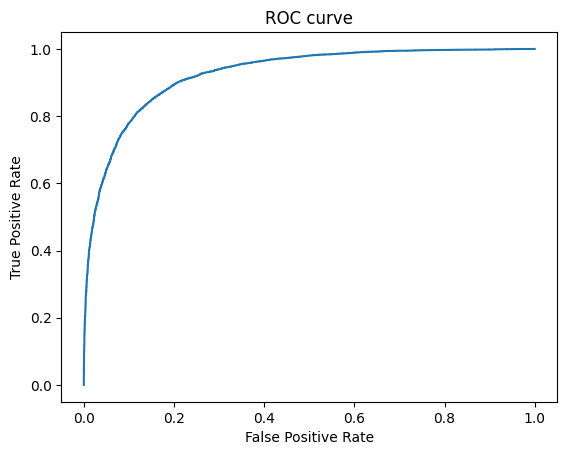

In [9]:
plt.plot(fpr, tpr, label='ROC curve')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

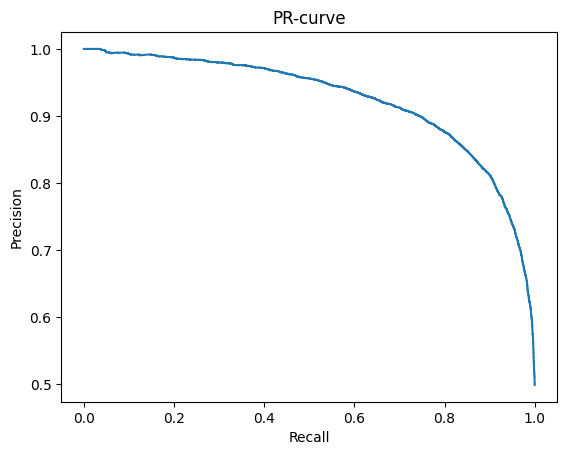

In [10]:
plt.plot(recall, precision)
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [11]:
print(f"""
Имеем довольно высокие показатели обоих метрик:
ROC-AUC = {roc_auc:.5f}
PR-AUC = {pr_auc:.5f}
Что может говорить о том, что модель работает достаточно хорошо (больше 0.9 уже можно считать хорошей моделью).
""")


Имеем довольно высокие показатели обоих метрик:
ROC-AUC = 0.92581
PR-AUC = 0.92440
Что может говорить о том, что модель работает достаточно хорошо (больше 0.9 уже можно считать хорошей моделью).



## Часть 2. Работа с категориальными переменными (3 балла)

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [12]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [13]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

**Задание 5 (0 баллов).** Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

In [14]:
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train, y_train)

predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.61470


**Задание 6 (0.5 балла).** Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_features = []
for col in data.columns.values.tolist():
  if 'cat' in col:
    cat_features.append(col)

enc = OneHotEncoder(drop = 'first')

transformed_train = enc.fit_transform(X_train[cat_features])
transformed_train = pd.DataFrame.sparse.from_spmatrix(transformed_train, columns=enc.get_feature_names_out())
X_train_cat = pd.concat([transformed_train, X_train.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)


transformed_test = enc.transform(X_test[cat_features])
transformed_test = pd.DataFrame.sparse.from_spmatrix(transformed_test, columns=enc.get_feature_names_out())
X_test_cat = pd.concat([transformed_test, X_test.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)


In [16]:
%%time
w0 = np.zeros(X_train_cat.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_cat, y_train)

CPU times: user 1h 1min, sys: 3h 3min 6s, total: 4h 4min 7s
Wall time: 31min 55s


LogReg(w0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]))

In [17]:
predicts = model.predict_proba(X_test_cat)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.61643


Получили совсем незначительный прирост качества для 32 минут обучения 0.6147->0.6164

Как можно было заменить, one-hot-кодирование сильно увилечивает количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 7 (1.5 балла).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше, без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментом. Заметили ли вы что-то интересное?


In [18]:
for feature in cat_features:
    full = pd.concat([X_train.reset_index(drop=True), pd.Series(y_train, name='target')], axis=1)
    replace = full.groupby(feature).agg({'target': 'mean'}).to_dict()['target']
    X_train[feature] = X_train[feature].replace(replace)
    X_test[feature] = X_test[feature].replace(replace)
print(X_train.iloc[0, :])

ps_ind_01          0.000000
ps_ind_02_cat      0.495424
ps_ind_03          5.000000
ps_ind_04_cat      0.486512
ps_ind_05_cat      0.479374
ps_ind_06_bin      1.000000
ps_ind_07_bin      0.000000
ps_ind_08_bin      0.000000
ps_ind_09_bin      0.000000
ps_ind_10_bin      0.000000
ps_ind_11_bin      0.000000
ps_ind_12_bin      0.000000
ps_ind_13_bin      0.000000
ps_ind_14          0.000000
ps_ind_15          5.000000
ps_ind_16_bin      1.000000
ps_ind_17_bin      0.000000
ps_ind_18_bin      0.000000
ps_reg_01          0.600000
ps_reg_02          0.300000
ps_reg_03          0.868188
ps_car_01_cat      0.446192
ps_car_02_cat      0.479677
ps_car_03_cat      0.472847
ps_car_04_cat      0.476990
ps_car_05_cat      0.524454
ps_car_06_cat      0.483755
ps_car_07_cat      0.487977
ps_car_08_cat      0.487694
ps_car_09_cat      0.476309
ps_car_10_cat      0.500136
ps_car_11_cat      0.535928
ps_car_11          2.000000
ps_car_12          0.417971
ps_car_13          0.963540
ps_car_14          0

In [19]:
%%time
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 1min 11s, total: 3min 40s
Wall time: 2min 18s


LogReg(w0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]))

In [20]:
predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.59767


ROC-AUC (0.5977) упал даже ниже чем при прямом обучении без предобработки признаков, но сильно уменьшилось время обучения по сравнению с OHE (до 2 мин 18c)

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо так, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

__Задание 8 (1 балл)__. Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.


In [21]:
noise = np.random.normal(0, 0.1, size=X_train[cat_features].shape)
X_train[cat_features] += noise
noise = np.random.normal(0, 0.1, size=X_test[cat_features].shape)
X_test[cat_features] += noise

In [22]:
%%time
w0 = np.zeros(X_train.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train, y_train)

CPU times: user 2min 28s, sys: 1min 10s, total: 3min 38s
Wall time: 2min 17s


LogReg(w0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]))

In [23]:
predicts = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.59767


Добавление шума в категориальные признаки не улучшает ROC-AUC

## Часть 3. Отбор признаков (3 балла + 1 бонус)

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом они увеличивают время вычислений) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [24]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [25]:
enc = OneHotEncoder(drop = 'first')

transformed_train = enc.fit_transform(X_train[cat_features])
transformed_train = pd.DataFrame.sparse.from_spmatrix(transformed_train, columns=enc.get_feature_names_out())
X_train_cat = pd.concat([transformed_train, X_train.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)


transformed_test = enc.transform(X_test[cat_features])
transformed_test = pd.DataFrame.sparse.from_spmatrix(transformed_test, columns=enc.get_feature_names_out())
X_test_cat = pd.concat([transformed_test, X_test.reset_index(drop=True)], axis=1).drop(cat_features, axis=1)

print(f'Получили {X_train_cat.shape[1]} признаков')

Получили 213 признаков


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [26]:
w0 = np.zeros(X_train_cat.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_cat, y_train)

LogReg(w0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [27]:
predicts = model.predict_proba(X_test_cat)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.50609


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 10 (1 балл).__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

In [28]:
%%time
params = np.abs(model.w).values.argsort()[-200:]
X_train_sorted = X_train_cat.iloc[:, params]
X_test_sorted = X_test_cat.iloc[:, params]


CPU times: user 103 ms, sys: 414 ms, total: 517 ms
Wall time: 69.4 ms


По сути время отбора признаков равно обучению модели на базовом наборе т.е. ~2 минуты

In [29]:
w0 = np.zeros(X_train_sorted.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_sorted, y_train)

predicts = model.predict_proba(X_test_sorted)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.50609


Качество не изменилось

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки.

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cat)
X_test_scaled = scaler.transform(X_test_cat)

w0 = np.zeros(X_train_scaled.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_scaled, y_train)

predicts = model.predict_proba(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество на просто масштабированных данных: ROC-AUC = {roc_auc:.5f}')

Качество на просто масштабированных данных: ROC-AUC = 0.63569


Теперь оставим 200 признаков

In [31]:
params = np.abs(model.w).argsort()[-200:]
X_train_sorted = X_train_scaled[:, params]
X_test_sorted = X_test_scaled[:, params]

w0 = np.zeros(X_train_sorted.shape[1])
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_sorted, y_train)

predicts = model.predict_proba(X_test_sorted)
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'ROC-AUC = {roc_auc:.5f}')

ROC-AUC = 0.63576


После масштабирования отбор 200 незначительно улучшил метрику (на 0.00007)

__Задание 10 (0.5 балла).__
Можно задать отбор признаков более функционально. Вспомним, что L1-регуляризация также умеет отбирать признаки. Понятно, что теперь нам будет сложнее оставить именно 200 лучших признаков, но возможно они нам и не нужны. Подберите коэффициент регуляризации и проверьте, как изменилось качество. Получилось ли добиться лучшего качества при менее чем 200 признаках?

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', C=0.01, max_iter=100, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [33]:
filtered = np.where(model.coef_ != 0)[1]
print(f'{len(filtered)} признаков осталось')

130 признаков осталось


In [34]:
w0 = np.zeros(X_train_scaled[:, filtered].shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_scaled[:, filtered], y_train)

predicts = model.predict_proba(X_test_scaled[:, filtered])
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество c признаками, отобранными L1 регуляризацией: ROC-AUC = {roc_auc:.5f}')

Качество c признаками, отобранными L1 регуляризацией: ROC-AUC = 0.63632


Качество улучшилось на 0.00056 :)

### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods.

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

Если у вас был курс математической статистики, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях. Если же нет, то интуиция следующая. Вообще мы хотим понять, различаются ли распределения признака для двух разных классов. Мы проверяем, что математические ожидания двух распределений различаются. Если они различаются, значит и сами распределения разные. Отсюда можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и статистика маленькая, то и признак бесполезен.

Важно оговориться, что хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и n велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются. По-хорошему, конечно, надо бы сравнивать статистику с пороговым значением t-распределения и полноценно тестировать гипотезу, но мы обойдёмся простой эвристикой и возьмём признаки с наибольшим значением.


__Задание 11 (1 балл)__. Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

In [35]:
%%time
def t_stat(x):
  x_pos = x[y_train == 1]
  x_neg = x[y_train == 0]
  mu_plus = np.mean(x_pos)
  mu_minus = np.mean(x_neg)
  sigma_plus = np.std(x_pos)
  sigma_minus = np.std(x_neg)
  return abs(mu_plus - mu_minus) / np.sqrt((len(x_pos) * sigma_plus**2 + len(x_neg) * sigma_minus**2) / (len(x_pos) + len(x_neg)))

scores = np.apply_along_axis(t_stat, axis=0, arr=X_train_scaled).argsort()[-200:]

CPU times: user 1.02 s, sys: 441 ms, total: 1.47 s
Wall time: 955 ms


Такой отбор признаков занял меньше секунды

In [36]:
w0 = np.zeros(X_train_scaled[:, scores].shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_scaled[:, scores], y_train)

predicts = model.predict_proba(X_test_scaled[:, scores])
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество c использованием фильтрации по t-статистике: ROC-AUC = {roc_auc:.5f}')

Качество c использованием фильтрации по t-статистике: ROC-AUC = 0.63591


Качество не изменилось (возможно выкинуть 13 признаков это слишком мало), попробуем как в случае с L1 оставить 130

In [37]:
scores = np.apply_along_axis(t_stat, axis=0, arr=X_train_scaled).argsort()[-130:]

w0 = np.zeros(X_train_scaled[:, scores].shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_scaled[:, scores], y_train)

predicts = model.predict_proba(X_test_scaled[:, scores])
fpr, tpr, thresholds = roc_curve(y_test, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество c использованием фильтрации по t-статистике до 130 признаков: ROC-AUC = {roc_auc:.5f}')

Качество c использованием фильтрации по t-статистике до 130 признаков: ROC-AUC = 0.63611


А так уже + 0,0002

Немного выросло, быстрее обучилось, но хуже чем отбор признаков в L1

### Методы-обёртки

__Задание 12 (бонус, 1 балл)__.


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [38]:
X_test_scaled.shape[1]

213

In [39]:
%%time
w0 = np.zeros(X_train_scaled.shape[1]-1)
model = LogReg(gd_type='stochastic', w0=w0, max_iter=100)
model.fit(X_train_scaled[:, :213], y_train)

CPU times: user 4min 13s, sys: 10min 2s, total: 14min 15s
Wall time: 1min 53s


LogReg(w0=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]))

Обучение 1 модели занимает 2 минуты, т.е. чтобы пробежаться по всем параметрам и найти тот, без которого качество будет лучше всего займет 213*2=416 минут. А это нужно проделать 13 раз, хоть признаков и будет становится меньше, но совсем незначительно относительно общего числа признаков.

Так что полный отбор до 200 признаков займет порядка 80-90 часов...

Попробуем обучение на 10000 объектов

In [40]:
np.random.seed(42)
indices = np.random.choice(np.arange(X_train_scaled.shape[0]), 10000)
X_train_small = X_train_scaled[indices]
y_train_small = y_train[indices]

X_test_small, X_val_small, y_test_small, y_val_small = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42) # тестировать и валидировать можно всех данных т.к. это не сильно влияет на общее время

In [41]:
w0 = np.zeros(X_train_small.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_small, y_train_small)

predicts = model.predict_proba(X_val_small)
fpr, tpr, thresholds = roc_curve(y_val_small, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество при обучении на 10000 признаков без отбора: ROC-AUC = {roc_auc:.5f}')

Качество при обучении на 10000 признаков без отбора: ROC-AUC = 0.57087


In [42]:
%%time
for _ in range(X_train_small.shape[1]-200):
  roc_auc = 0
  index_to_remove = 0
  for i in range(X_train_small.shape[1]):
    X_train_small_temp = np.delete(X_train_small, [i], axis=1)
    X_test_small_temp = np.delete(X_test_small, [i], axis=1)

    w0 = np.zeros(X_train_small_temp.shape[1])
    model = LogReg(gd_type='stochastic', w0=w0)
    model.fit(X_train_small_temp, y_train_small)

    predicts = model.predict_proba(X_test_small_temp)
    fpr, tpr, thresholds = roc_curve(y_test_small, predicts)
    roc_auc_temp = auc(fpr, tpr)

    if roc_auc_temp > roc_auc:
      roc_auc = roc_auc_temp
      index_to_remove = i

  X_train_small = np.delete(X_train_small, [index_to_remove], axis=1)
  X_test_small = np.delete(X_test_small, [index_to_remove], axis=1)
  X_val_small = np.delete(X_val_small, [index_to_remove], axis=1)
  print(f'Удалили признак #{index_to_remove} и качество на test стало {roc_auc:.5f}')

Удалили признак #109 и качество на test стало 0.57817
Удалили признак #18 и качество на test стало 0.57971
Удалили признак #123 и качество на test стало 0.58122
Удалили признак #112 и качество на test стало 0.58270
Удалили признак #37 и качество на test стало 0.58389
Удалили признак #204 и качество на test стало 0.58496
Удалили признак #48 и качество на test стало 0.58599
Удалили признак #152 и качество на test стало 0.58704
Удалили признак #83 и качество на test стало 0.58807
Удалили признак #3 и качество на test стало 0.58909
Удалили признак #1 и качество на test стало 0.59011
Удалили признак #191 и качество на test стало 0.59116
Удалили признак #191 и качество на test стало 0.59222
CPU times: user 1h 35min 11s, sys: 3h 2min 29s, total: 4h 37min 41s
Wall time: 36min 22s


Итого:

1. За 36 минуты удалили 13 признаков
2. Качество на тестовой выборке выросло на ~0.014, проверим на валидационной

In [43]:
w0 = np.zeros(X_train_small.shape[1])
model = LogReg(gd_type='stochastic', w0=w0)
model.fit(X_train_small, y_train_small)

predicts = model.predict_proba(X_val_small)
fpr, tpr, thresholds = roc_curve(y_val_small, predicts)
roc_auc = auc(fpr, tpr)
print(f'Качество при обучении на 10000 признаков без отбора c отбором 200 признаков методом-оберткой: ROC-AUC = {roc_auc:.5f}')

Качество при обучении на 10000 признаков без отбора c отбором 200 признаков методом-оберткой: ROC-AUC = 0.58158


Итого на валидационной выборке после удаления 13 признаков качество вырасло на 0.01

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


**Задание 13 (0.5 балла)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

**Ответ:**

1. **Метод фильтрации**

Приемущества:

- Очень быстрый относительно других способов.

Недостатки:

- Заранее непонятно какое количество параметров оставлять.

2. **Встроенные методы**

Приемущества:

- Все еще довольно быстрый (время обучения 1 модели)
- Автоматически определяет сколько параметров отбросить (и нужно ли вообще)

Недостатки:

- Нужно подбирать гиперпараметры и от них могут зависить зануленные веса.



3. **Методы-обертки**

Приемущества:

- Дают лучшее качество
- Можно удобно посчитать как изменяется качество при удалении параметров (иногда может понадобится выбрать худшее по качеству, но с меньшим каличеством параметров, это можно подобрать)

Недостатки:

- Очень долгие


| Способ| Время | Прирост качества (200 признаков) |
| --- | --- | --- |
| Фильрация | <1 сек | 0 |
| Встроенные | 2 минуты | 0 |
| Обертки | 36 минут | 0.01 |

Как показали первые 2 метода, прироста (совсем небольшого) можно добиться если удалять больше признаков, но т.к. применял обертку только для 200 признаков, то сравнение на этом значении